## Insertion sort usando permutaciones de tamaño N

In [1]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def insertion_sort(arr):
    """
    Retorna una tupla con la cantidad de instrucciones, comparaciones y swaps (intercambios)
    """
    ins = 0  # instrucciones
    comp = 0  # comparaciones
    swaps = 0  # swaps (intercambios)
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        ins += 3    # i = ; key =; j = ;
        while j >= 0 and key < arr[j]:
            comp += 1    # key < arr[j];
            arr[j+1] = arr[j]   # Desplaza hacia la derecha el valor
            swaps += 1
            j -= 1
            ins += 3    # arr[j+1] =; j =; j >=;
        arr[j+1] = key; ins += 1
    return ins, comp, swaps

In [3]:
instructions = []   # Lista para manejar las instrucciones
comparisons = []    # Lista para manejar las comparaciones
swaps = []      # Lista para manejar los swaps
max = 11    # Cantidad maxima de permutaciones, mediante experimentacion el maximo no deberia ser mayor a 10

In [4]:
print("N \tNumber of permutations")
for n in range(1, max):

    # Lista que guarda todas las permutaciones, cada permutacion es una tupla
    permut = list(permutations(range(n)))
    #print(permut)
    print("{}\t{}".format(n, len(permut)))
    i_aux = []
    c_aux = []
    s_aux = []
    for p in permut:
        p = list(p)
        #print(p)
        i, c, s = insertion_sort(p)
        #print("i: {}, c: {}, s: {}".format(i, c, s))
        i_aux.append(i)
        c_aux.append(c)
        s_aux.append(s)

    instructions.append(i_aux)
    comparisons.append(c_aux)
    swaps.append(s_aux)

N 	Number of permutations
1	1
2	2
3	6
4	24
5	120
6	720
7	5040
8	40320
9	362880
10	3628800


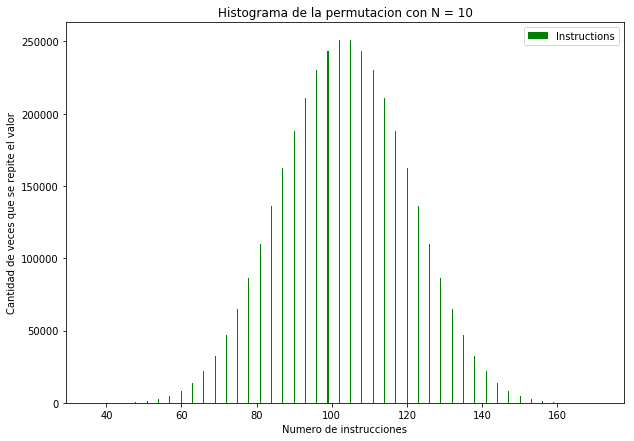

In [5]:
plt.rcParams['figure.figsize'] = 10,7 # width, height
len_i = len(instructions)
arr_hist = instructions[len_i-1]
plt.hist(arr_hist, bins='auto', color="g")
title = "Histograma de la permutacion con N = " + str(len_i)
plt.title(title)
plt.xlabel("Numero de instrucciones")
plt.ylabel("Cantidad de veces que se repite el valor")
plt.legend(["Instructions"])

plt.show()

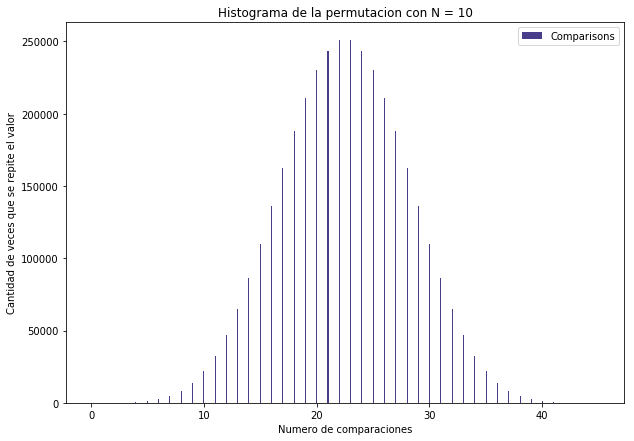

In [6]:
#plt.rcParams['figure.figsize'] = 10,7 # width, height
len_i = len(comparisons)
comp_hist = comparisons[len_i-1]
plt.hist(comp_hist, bins='auto', color="darkslateblue")
title = "Histograma de la permutacion con N = " + str(len_i)
plt.title(title)
plt.xlabel("Numero de comparaciones")
plt.ylabel("Cantidad de veces que se repite el valor")
plt.legend(["Comparisons"])

plt.show()

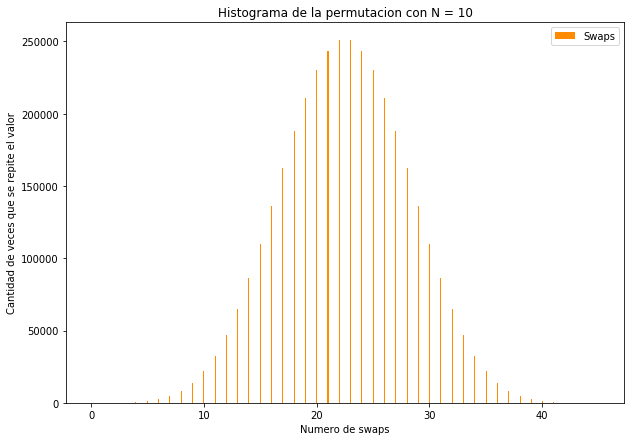

In [7]:
#plt.rcParams['figure.figsize'] = 10,7 # width, height
len_i = len(swaps)
swaps_hist = swaps[len_i-1]
plt.hist(comp_hist, bins='auto', color="darkorange")
title = "Histograma de la permutacion con N = " + str(len_i)
plt.title(title)
plt.xlabel("Numero de swaps")
plt.ylabel("Cantidad de veces que se repite el valor")
plt.legend(["Swaps"])

plt.show()

In [8]:
def means(seq):
    """
    Retorna una lista con las medias de cada lista dentro de la secuencia
    """
    return [np.mean(s) for s in seq]

[0.0, 5.5, 12.5, 21.0, 31.0, 42.5, 55.5, 70.0, 86.0, 103.5]
[0.0, 0.5, 1.5, 3.0, 5.0, 7.5, 10.5, 14.0, 18.0, 22.5]
[0.0, 0.5, 1.5, 3.0, 5.0, 7.5, 10.5, 14.0, 18.0, 22.5]


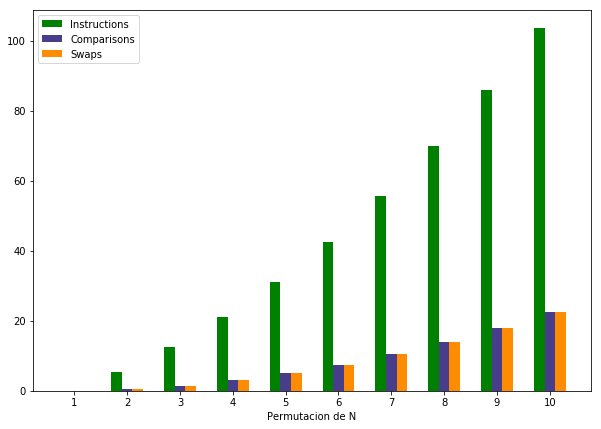

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
x_axe = np.arange(1, max)
w = 0.2     # width

ins_means = means(instructions)
ax.bar(x_axe, ins_means, w, color="g")

comp_means = means(comparisons)
ax.bar(x_axe+w, comp_means, w, color="darkslateblue")

swaps_means = means(swaps)
ax.bar(x_axe+2*w, swaps_means, w, color="darkorange")

ax.set_xticks(x_axe+w)
ax.set_xticklabels(x_axe)
ax.legend(["Instructions", "Comparisons", "Swaps"])
ax.set_xlabel("Permutacion de N")

print(ins_means)
print(comp_means)
print(swaps_means)

plt.show()